In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

from tqdm import tqdm
from scipy.io import wavfile as wav
from sklearn.model_selection import train_test_split

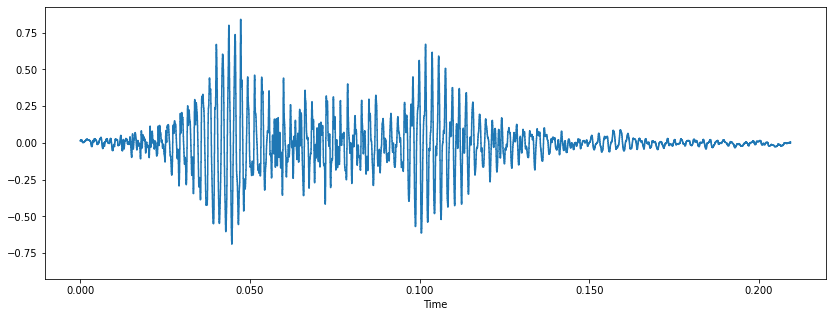

[0.01347296 0.01897015 0.01633179 ... 0.00519732 0.00762972 0.        ]


In [25]:
dog_bark_filepath = os.path.join('audio', 'fold2', '4911-3-0-0.wav')
data, sample_rate = librosa.load(dog_bark_filepath)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.show()

ipd.Audio(dog_bark_filepath)

print(data)

In [26]:
sample_rate

22050

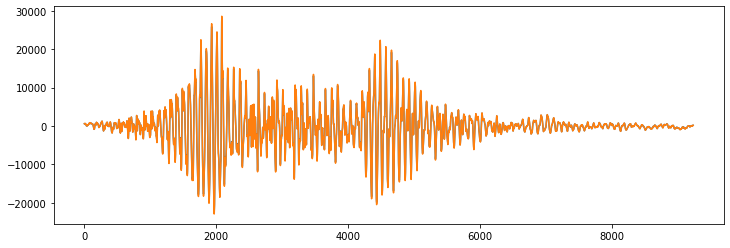

(44100,
 array([[603, 622],
        [585, 610],
        [541, 552],
        ...,
        [216, 224],
        [243, 254],
        [222, 226]], dtype=int16),
 array([0.01347296, 0.01897015, 0.01633179, ..., 0.00519732, 0.00762972,
        0.        ], dtype=float32))

In [27]:
wav_sample_rate, wav_data = wav.read(dog_bark_filepath)

plt.figure(figsize=(12, 4))
plt.plot(wav_data)
plt.show()

wav_sample_rate, wav_data, data

In [28]:
metadata_df = pd.read_csv(os.path.join('metadata', 'UrbanSound8K.csv'))

metadata_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [29]:
metadata_df['class'].value_counts()

street_music        1000
children_playing    1000
engine_idling       1000
dog_bark            1000
drilling            1000
air_conditioner     1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [30]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfccs.shape

(40, 10)

In [31]:
def mfcc_features_extractor(filepath: str):
  audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [32]:
extracted_features = []

for index, row in tqdm(metadata_df.iterrows()):
  filepath = os.path.join('audio', f'fold{row["fold"]}', row['slice_file_name'])
 
  final_class_label = row['class']
  data = mfcc_features_extractor(filepath)

  extracted_features.append([data, final_class_label])

138it [00:03, 35.89it/s]

In [ ]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

In [ ]:
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
y = np.array(pd.get_dummies(y))

x.shape, y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape